# Performance Evaluation

## Strategy Return Analysis

In [1]:
import bt
import talib
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
def buy_and_hold(ticker, name, start='2020-2-1', end='2020-11-1'):
    # Get the data
    price_data = bt.get(ticker, start=start, end=end)
    # Define the benchmark strategy
    bt_strategy = bt.Strategy(name, 
                              [bt.algos.RunOnce(),
                               bt.algos.SelectAll(),
                               bt.algos.WeighEqually(),
                               bt.algos.Rebalance()])
    # Return the backtest
    return bt.Backtest(bt_strategy, price_data)

# Create benchmark strategy backtest
benchmark = buy_and_hold('tsla', name='benchmark')

# Run all backtests and plot the resutls
bt_result = bt.run(benchmark)

In [4]:
def signal_strategy(ticker, period, name, start='2017-2-1', end='2020-11-1'):
    # Get the data and calculate SMA
    price_data = bt.get(ticker, start=start, end=end)
    sma = price_data.rolling(period).mean()
    # Define the signal-based trategy
    bt_strategy = bt.Strategy(name,
                              [bt.algos.SelectWhere(price_data > sma),
                               bt.algos.WeighEqually(),
                               bt.algos.Rebalance()])
    # Return the backtest
    return bt.Backtest(bt_strategy, price_data)

# Create signal strategy backtest
sma30 = signal_strategy('tsla', period=30, name='SMA30')
sma50 = signal_strategy('tsla', period=50, name='SMA50')

# Run all backtests and plot the resutls
bt_results = bt.run(sma30, sma50)

### Review return results of a backtest
You implemented a trend-following strategy using a simple moving average indicator. You backtested it using the Amazon stock historical price data from 2019 to 2020, and the result plot is shown on the right. Now you would like to review the return statistics from the backtest result.

In [5]:
# Obtain all backtest stats q q
resInfo = bt_result.stats

# Get daily, monthly, and yearly returns
print('Daily return: %.4f'% resInfo.loc['daily_mean'])
print('Monthly return: %.4f'% resInfo.loc['monthly_mean'])
print('Yearly return: %.4f'% resInfo.loc['yearly_mean'])

Daily return: 1.6601
Monthly return: 2.2043
Yearly return: nan


In [6]:
# Get the compound annual growth rate
print('Compound annual growth rate: %.4f'% resInfo.loc['cagr'])

Compound annual growth rate: 2.4149


### Plot return histograms of a backtest
Continue with the same strategy backtest result from the previous exercise. Now you would like to plot return histograms to further examine the characteristics of the return distribution.

Text(0.5, 0.98, 'daily Return Histogram Matrix')

<Figure size 432x288 with 0 Axes>

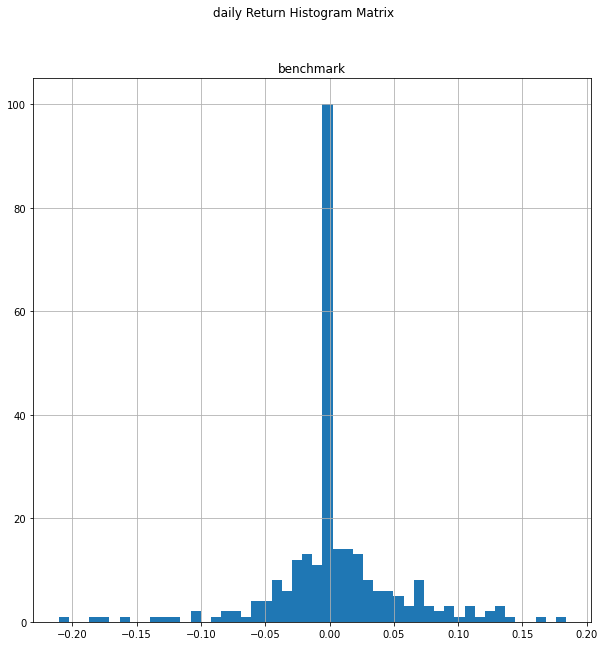

In [7]:
# Plot the daily return histogram
bt_result.plot_histograms(bins=50, freq = 'd')

<img src='Data/daily_return.jpg'>

Text(0.5, 0.98, 'weekly Return Histogram Matrix')

<Figure size 432x288 with 0 Axes>

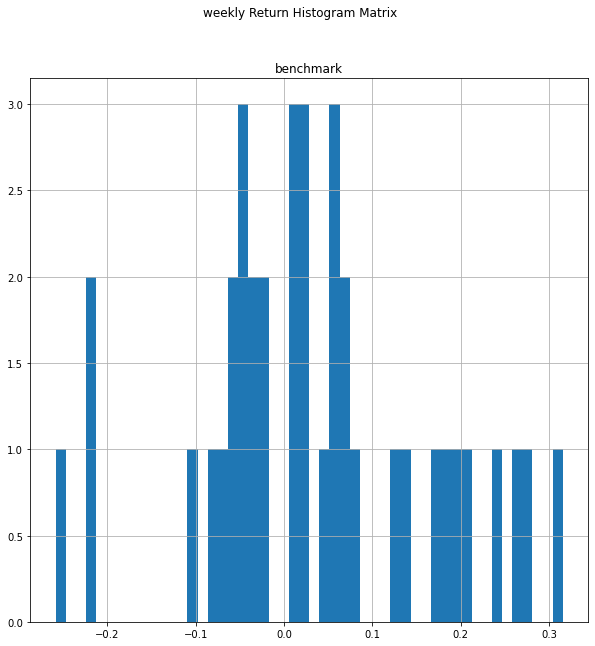

In [8]:
# Plot the weekly return histogram
bt_result.plot_histograms(bins=50, freq = 'w')

<img src='Data/weekly_return.jpg'>

### Compare return results of multiple strategies
With the same strategy using a simple moving average indicator, you also conducted a strategy optimization by varying the lookback periods of the moving average indicator from 30 to 50 days. You backtested both strategies using the Google stock historical price data from 2017 to 2020. Now you are about to compare the backtest results.

In [9]:
# Get the lookback returns
lookback_returns = bt_results.display_lookback_returns()
print(lookback_returns)

         SMA30    SMA50
mtd     -6.65%   -5.36%
3m      -0.00%   36.48%
6m      90.24%  159.64%
ytd    310.51%  353.26%
1y     436.19%  501.91%
3y      48.14%   54.92%
5y        nan%     nan%
10y       nan%     nan%
incep   36.78%   41.06%


## Drawdown

### Review performance with drawdowns
You implemented a signal-based strategy using two moving average indicators. You performed a backtest using the Tesla stock historical price data from 2019 to 2020, and the result plot is shown on the right. Now you would like to evaluate the strategy performance, specifically the downside volatility, by reviewing the drawdown result from the backtest.

In [10]:
# Obtain all backtest stats
resInfo = bt_result.stats    # Buy and Hold Strategy

In [11]:
# Get the average drawdown
avg_drawdown = resInfo.loc['avg_drawdown']
print('Average drawdown: %.2f'% avg_drawdown)

Average drawdown: -0.12


In [12]:
# Get the average drawdown days
avg_drawdown_days = resInfo.loc['avg_drawdown_days']
print('Average drawdown days: %.0f'% avg_drawdown_days)

Average drawdown days: 20


### Calculate and review the Calmar ratio
Continue with the same strategy. From the previous exercise, you know that the average drawdown is approximately 11%, and that the average period is 22 days. Now you would like to get a better understanding of the risk-return profile of it. You plan to review the CAGR, max drawdown, then use them to calculate the Calmar ratio and assess the result.

In [13]:
# Get the CAGR
cagr = resInfo.loc['cagr']
print('Compound annual growth rate: %.4f'% cagr)

Compound annual growth rate: 2.4149


In [14]:
# Get the max drawdown
max_drawdown = resInfo.loc['max_drawdown']
print('Maximum drawdown: %.2f'% max_drawdown)

Maximum drawdown: -0.61


In [15]:
# Calculate Calmar ratio manually
calmar_calc = cagr / max_drawdown * (-1)
print('Calmar Ratio calculated: %.2f'% calmar_calc)

Calmar Ratio calculated: 3.98


In [16]:
# Get the Calmar ratio
calmar = resInfo.loc['calmar']
print('Calmar Ratio: %.2f'% calmar)

Calmar Ratio: 3.98


## Sharpe Ratio and Sortino Ratio

In [17]:
# Run all backtests and plot the resutls
bt_result = bt.run(signal_strategy('tsla', period=50, name='SMA50',start='2017-2-1', end='2020-11-1'))

# Obtain all backtest stats
resInfo = bt_result.stats    # Buy and Hold Strategy

### Evaluate strategy performance by Sharpe ratio
The Sharpe ratio is a risk-adjusted return measure developed by Nobel laureate William F. Sharpe. It is calculated as the average return over the risk-free rate divided by the standard deviation of the excess return.

In [18]:
# Get annual return and volatility
yearly_return = resInfo.loc['yearly_mean']
print('Annual return: %.2f'% yearly_return)
yearly_vol = resInfo.loc['yearly_vol']
print('Annual volatility: %.2f'% yearly_vol)

Annual return: 1.15
Annual volatility: 2.08


In [19]:
# Calculate the Sharpe ratio manually
sharpe_ratio = yearly_return / yearly_vol
print('Sharpe ratio calculated: %.2f'% sharpe_ratio)

Sharpe ratio calculated: 0.55


In [20]:
# Get Sharpe ratios from the backtest stats
print('Sharpe ratio daily: %.2f'% resInfo.loc['daily_sharpe'])
print('Sharpe ratio monthly %.2f'% resInfo.loc['monthly_sharpe'])
print('Sharpe ratio annually %.2f'% resInfo.loc['yearly_sharpe'])

Sharpe ratio daily: 0.96
Sharpe ratio monthly 0.81
Sharpe ratio annually 0.55


### Evaluate strategy performance by Sortino ratio
The Sortino ratio is the excess return over the risk-free rate divided by the downside deviation, and thus it measures the excess return to "bad" volatility. In other words, it doesn't penalize the volatility of positive excess returns.

In [21]:
# Get Sortino ratio from backtest stats
print('Sortino ratio daily: %.2f'% resInfo.loc['daily_sortino'])
print('Sortino ratio monthly %.2f'% resInfo.loc['monthly_sortino'])
print('Sortino ratio annually %.2f'% resInfo.loc['yearly_sortino'])

Sortino ratio daily: 1.57
Sortino ratio monthly 2.87
Sortino ratio annually 6.90
